# Curso de Capacitación en Python para Data Science - Desafío

<img src='https://dci.pucp.edu.pe/wp-content/uploads/2014/02/logo-color-pucp1.gif' width=200px>


Dr. Edwin Villanueva, Dra. Soledad Espezua, Ing. Daniel Saromo

<font color='#33FFEE'> Visualización de datos en Python.</font>

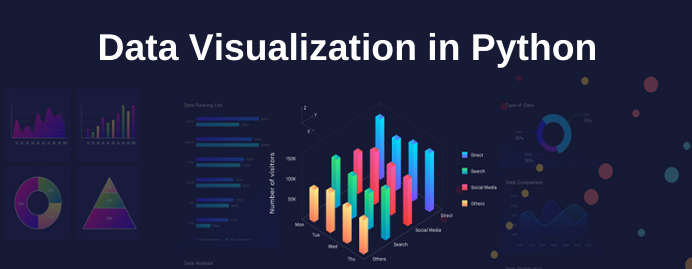

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

## Desafío de la semana <font color=red> (20 puntos) </font>

### Parte 1: Visualización geográfica de fallecidos por COVID-19     <font color=red> (7 puntos) </font>

Fuente del dataset: Ministerio de Salud del Perú

https://www.minsa.gob.pe/datosabiertos/

<img src='https://img2.rtve.es/i/?w=1600&i=1615998979529.jpg' width=500px>

In [ ]:
# Importa algunas librerias base
import pandas as pd
import numpy as np

In [ ]:
# Carga datos de un archivo csv: Este es el dataframe incompleto
filename = "fallecidos_covid.csv"

# carga datos del csv sin asignar nombres de columnas (ya que el csv tiene su cabecera en la primera fila)
# buenas prácticas: abrir manualmente el archivo en un editor de texto antes de cargarlo a python
# colocamos `header=0` porque el archivo csv ya tenía una cabecera
# no olvidar indicar el delimitador adecuado
# colocamos `index_col=False`, porque no queremos que la primera columna del dataset la considere como columna index 
# el presente archivo no está en codificación utf-8, por lo que es necesario indicar manualmente su encoding

covid_data = pd.read_csv(filename, delimiter=";", index_col=False, encoding='latin-1', header=0)

covid_data.head()  # muestra los 5 primeros registros del DataFrame

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210621,7320cabdc1aaca6c59014cae76a134e6,20200519,89,MASCULINO,Criterio SINADEF,150201.0,LIMA REGION,BARRANCA,BARRANCA
1,20210621,e81602051997ace8340bb8c18fe24c65,20200517,90,MASCULINO,Criterio SINADEF,150605.0,LIMA REGION,HUARAL,CHANCAY
2,20210621,cecdbf10074dbc011ae05b3cbd320a6f,20200521,91,MASCULINO,Criterio SINADEF,150801.0,LIMA REGION,HUAURA,HUACHO
3,20210621,71ecb6bccb248b0bb2ac72ed51b5e979,20200529,81,MASCULINO,Criterio SINADEF,150514.0,LIMA REGION,CAÑETE,SAN LUIS
4,20210621,566af4276cbe9359abe93f9aa86396c3,20200529,82,MASCULINO,Criterio SINADEF,150608.0,LIMA REGION,HUARAL,PACARAOS


In [ ]:
covid_data.describe()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,UBIGEO
count,190906.0,1.909060e+05,190906.000000,190901.000000
mean,20210621.0,2.020563e+07,66.124019,134515.010670
std,0.0,4.813072e+03,15.198643,50500.169286
min,20210621.0,2.020030e+07,0.000000,10101.000000
25%,20210621.0,2.020072e+07,57.000000,110501.000000
50%,20210621.0,2.021011e+07,67.000000,150110.000000
75%,20210621.0,2.021033e+07,77.000000,150140.000000
max,20210621.0,2.021062e+07,117.000000,250401.000000


In [ ]:
len(covid_data['DEPARTAMENTO'].unique())

26

In [ ]:
# Sumarizamos la data de inmigrantes por Continente
df_departamentos = covid_data.groupby('DEPARTAMENTO', axis=0).sum()
df_departamentos.tail()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,UBIGEO
DEPARTAMENTO,,,,
PUNO,73485817956,73470324526,231890,765784079.0
SAN MARTIN,57822586681,57806408573,187641,631053838.0
TACNA,36904593946,36896469907,117830,420185339.0
TUMBES,30295720879,30287934327,98370,359972016.0
UCAYALI,60712705484,60696522440,189395,751356186.0


In [ ]:
# Sumarizamos la data de inmigrantes por Continente
df_departamentos = covid_data[['DEPARTAMENTO']].count()
df_departamentos.tail()

DEPARTAMENTO    190906
dtype: int64

In [ ]:
# Sumarizamos la data de inmigrantes por Continente
df_departamentos = covid_data[['DEPARTAMENTO']].count()
df_departamentos.tail()

DEPARTAMENTO    190906
dtype: int64

In [ ]:
serie_departamentos = covid_data.groupby('DEPARTAMENTO')['UUID'].nunique()
serie_departamentos.tail(12) # es un pandas series

DEPARTAMENTO
LIMA METROPOLITANA    79076
LIMA REGION            6919
LORETO                 4018
MADRE DE DIOS           739
MOQUEGUA               1381
PASCO                   971
PIURA                 11485
PUNO                   3636
SAN MARTIN             2861
TACNA                  1826
TUMBES                 1499
UCAYALI                3004
Name: UUID, dtype: int64

In [ ]:
df_departamentos = serie_departamentos.to_frame(name='FALLECIDOS').reset_index()
# el reset index está para que no considere la primera columna como index

In [ ]:
df_departamentos.describe()

,FALLECIDOS
count,26.000000
mean,7342.538462
std,14981.787186
min,739.000000
25%,1580.750000
50%,3750.500000
75%,7645.000000
max,79076.000000


In [ ]:
df_departamentos.tail()

,DEPARTAMENTO,FALLECIDOS
21,PUNO,3636
22,SAN MARTIN,2861
23,TACNA,1826
24,TUMBES,1499
25,UCAYALI,3004


In [ ]:
df_departamentos.head(16)

,DEPARTAMENTO,FALLECIDOS
0,AMAZONAS,1154
1,ANCASH,6394
2,APURIMAC,1406
3,AREQUIPA,8543
4,AYACUCHO,1955
5,CAJAMARCA,3865
6,CALLAO,9690
7,CUSCO,4414
8,HUANCAVELICA,1101
9,HUANUCO,2569


In [ ]:
# MÉTODO 1 PARA OBTENER MÁSCARA BOOLEANA
limas = ['LIMA REGION', 'LIMA METROPOLITANA']
mask_limas = (df_departamentos['DEPARTAMENTO'].isin(limas))
mask_limas

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: DEPARTAMENTO, dtype: bool

In [ ]:
# MÉTODO 2 PARA OBTENER MÁSCARA BOOLEANA
mask_limas = ((df_departamentos['DEPARTAMENTO'] == "LIMA REGION") | (df_departamentos['DEPARTAMENTO'] == "LIMA METROPOLITANA"))
mask_limas

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: DEPARTAMENTO, dtype: bool

In [ ]:
cant_fallecidos_limas = df_departamentos[mask_limas]['FALLECIDOS'].sum()
cant_fallecidos_limas

85995

In [ ]:
df_departamentos = df_departamentos[~mask_limas] # FILTRADO USANDO EL NEGADO DE LA MÁSCARA BOOLEANA

In [ ]:
df_departamentos

,DEPARTAMENTO,FALLECIDOS
0,AMAZONAS,1154
1,ANCASH,6394
2,APURIMAC,1406
3,AREQUIPA,8543
4,AYACUCHO,1955
5,CAJAMARCA,3865
6,CALLAO,9690
7,CUSCO,4414
8,HUANCAVELICA,1101
9,HUANUCO,2569


In [ ]:
df_departamentos = df_departamentos.append({'DEPARTAMENTO':'LIMA', 'FALLECIDOS':cant_fallecidos_limas}, ignore_index=True)

In [ ]:
df_departamentos

,DEPARTAMENTO,FALLECIDOS
0,AMAZONAS,1154
1,ANCASH,6394
2,APURIMAC,1406
3,AREQUIPA,8543
4,AYACUCHO,1955
5,CAJAMARCA,3865
6,CALLAO,9690
7,CUSCO,4414
8,HUANCAVELICA,1101
9,HUANUCO,2569


In [ ]:
poblacion =[ #Población por departamento. fuente INEI - CENSO 2017
    157560,
    686728,
    185964,
    1268941,
    358045,
    475068,
    994494,
    731252,
    105862,
    375432,
    786417,
    884928,
    1403555,
    971121,
    606743,
    116743,
    151891,
    160269,
    1471833,
    630648,
    554079,
    296788,
    210592,
    402144,
    9324796,
    ]

In [ ]:
df_departamentos['POBLACION'] = poblacion

In [ ]:
df_departamentos.sort_values(by=['DEPARTAMENTO'], inplace=True)

In [ ]:
df_departamentos

,DEPARTAMENTO,FALLECIDOS,POBLACION
0,AMAZONAS,1154,157560
1,ANCASH,6394,686728
2,APURIMAC,1406,185964
3,AREQUIPA,8543,1268941
4,AYACUCHO,1955,358045
5,CAJAMARCA,3865,475068
6,CALLAO,9690,994494
7,CUSCO,4414,731252
8,HUANCAVELICA,1101,105862
9,HUANUCO,2569,375432


##### Graficar mapa del Perú usando GeoPandas

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.3MB/s 
     |████████████████████████████████| 15.4MB 193kB/s 
     |████████████████████████████████| 6.6MB 36.9MB/s 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# FUENTE DEL MAPA: https://www.kaggle.com/noemelo/geojson-departamentos-peru
url_geojson = "peru_departamental_simple.geojson"
region_geojson = gpd.read_file(url_geojson)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [ ]:
region_geojson.dtypes

NOMBDEP         object
COUNT            int64
FIRST_IDDP      object
HECTARES       float64
geometry      geometry
dtype: object

In [ ]:
region_geojson['NOMBDEP'].unique()

array(['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
       'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA',
       'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO',
       'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO',
       'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI'], dtype=object)

In [ ]:
len(region_geojson['NOMBDEP'].unique())

25

In [ ]:
df_departamentos['DEPARTAMENTO'].unique()

array(['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
       'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA',
       'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO',
       'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO',
       'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI'], dtype=object)

In [ ]:
len(df_departamentos['DEPARTAMENTO'].unique())

25

In [ ]:
# qué pasa si no colocamos en escala logarítmica?
region_geojson['N_FALLECIDOS'] = np.log10(df_departamentos['FALLECIDOS'].values) # sin el .values, se desordena

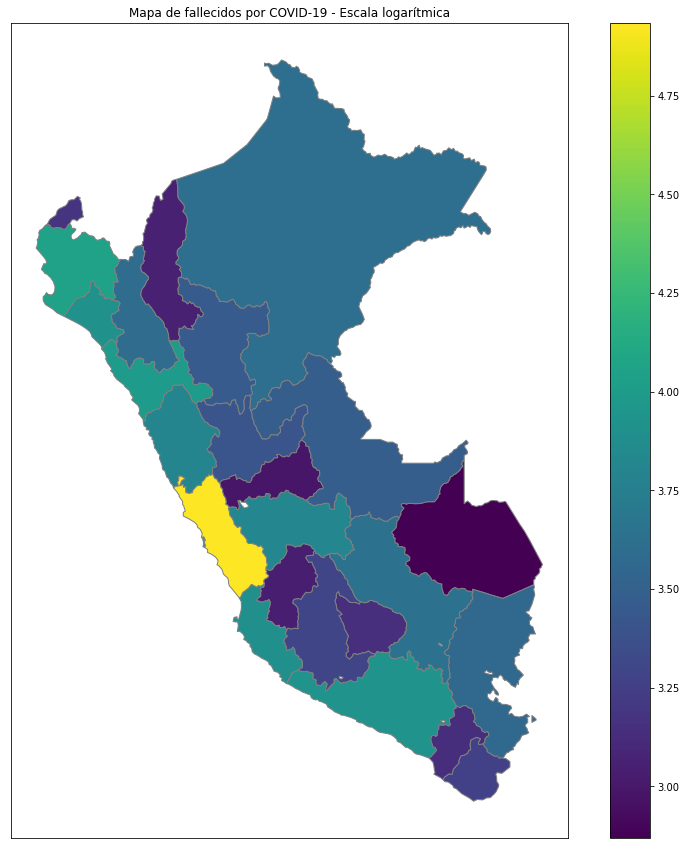

In [ ]:
region_geojson.plot(column='N_FALLECIDOS',figsize=(15, 15),legend=True,edgecolor=u'gray')
plt.xticks([]) # para borrar ticks en eje x
plt.yticks([]) # para borrar ticks en eje y
plt.title("Mapa de fallecidos por COVID-19 - Escala logarítmica")
plt.show()

#### Para desarrollar

- Mostrar en un mapa con escala logarítmica (por departamentos) la cantidad de peruanos fallecidos por COVID-19, cuya edad es mayor o igual a 65 años: 2 puntos:

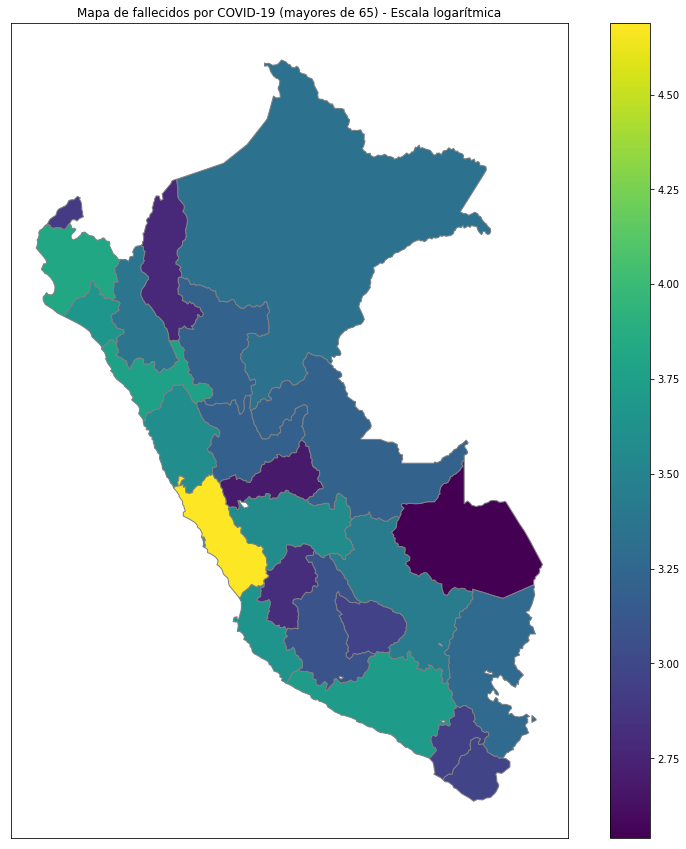

In [ ]:
covid_data_senior = covid_data[covid_data['EDAD_DECLARADA'] >= 65]
# covid_data_senior.describe()

serie_departamentos = covid_data_senior.groupby('DEPARTAMENTO')['UUID'].nunique()
df_dep = serie_departamentos.to_frame(name='FALLECIDOS').reset_index()
# df_dep.head(15)

limas = ['LIMA REGION', 'LIMA METROPOLITANA']
mask_limas = (df_dep['DEPARTAMENTO'].isin(limas))
cant_fallecidos_limas = df_dep[mask_limas]['FALLECIDOS'].sum()
df_dep = df_dep[~mask_limas]
df_dep = df_dep.append({'DEPARTAMENTO':'LIMA', 'FALLECIDOS': cant_fallecidos_limas}, ignore_index=True)
df_dep.sort_values(by=['DEPARTAMENTO'], inplace=True)

region_geojson['N_FALLECIDOS_SENIOR'] = np.log10(df_dep['FALLECIDOS'].values)
region_geojson.plot(column='N_FALLECIDOS_SENIOR', figsize=(15, 15), legend=True, edgecolor=u'gray')
plt.xticks([]) # para borrar ticks en eje x
plt.yticks([]) # para borrar ticks en eje y
plt.title("Mapa de fallecidos por COVID-19 (mayores de 65) - Escala logarítmica")
plt.show()

- Hacer un diagrama de barras horizontales de los 10 departamentos con mayor cantidad de fallecidos por COVID-19: 2 puntos

In [ ]:
df_departamentos.set_index('DEPARTAMENTO', inplace=True)

In [ ]:
df_departamentos.head()

,FALLECIDOS,POBLACION
DEPARTAMENTO,,
LIMA,85995,9324796
PIURA,11485,1471833
LA LIBERTAD,9808,1403555
CALLAO,9690,994494
AREQUIPA,8543,1268941


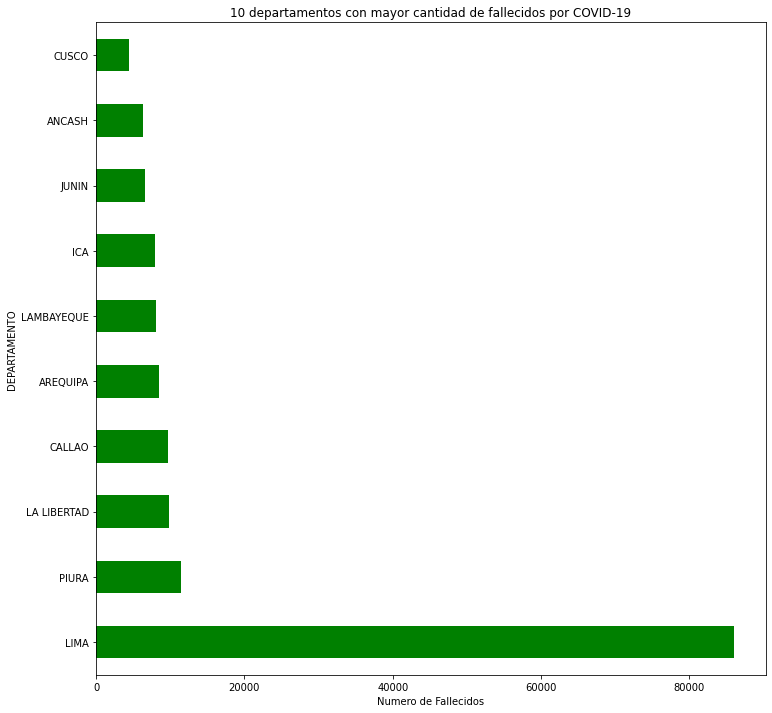

In [ ]:
df_departamentos.sort_values(by=['FALLECIDOS'], ascending=False, inplace=True)
data_top10 = df_departamentos['FALLECIDOS'].head(10)

data_top10.plot(kind='barh', figsize=(12, 12), color='g')
plt.xlabel('Numero de Fallecidos')
plt.title('10 departamentos con mayor cantidad de fallecidos por COVID-19')
plt.show()

- Mostrar un diagrama de barras verticales a los 10 departamentos con el mayor porcentaje de fallecidos COVID-19 por cada habitante: 3 puntos

In [ ]:
df_departamentos['% FALLECIDOS POR HAB'] = df_departamentos['FALLECIDOS'] / df_departamentos['POBLACION'] * 100
df_departamentos.sort_values(by=['% FALLECIDOS POR HAB'], ascending=False, inplace=True)

In [ ]:
series_dptos = df_departamentos['% FALLECIDOS POR HAB'].copy()
series_dptos

DEPARTAMENTO
HUANCAVELICA     1.040033
ICA              1.002903
CALLAO           0.974365
ANCASH           0.931082
LIMA             0.922219
MOQUEGUA         0.909205
LAMBAYEQUE       0.833264
CAJAMARCA        0.813568
PIURA            0.780320
APURIMAC         0.756060
JUNIN            0.747292
UCAYALI          0.746996
AMAZONAS         0.732419
TUMBES           0.711803
LA LIBERTAD      0.698797
HUANUCO          0.684278
AREQUIPA         0.673239
LORETO           0.662224
MADRE DE DIOS    0.633014
TACNA            0.615254
PASCO            0.605856
CUSCO            0.603622
PUNO             0.576550
AYACUCHO         0.546021
SAN MARTIN       0.516352
Name: % FALLECIDOS POR HAB, dtype: float64

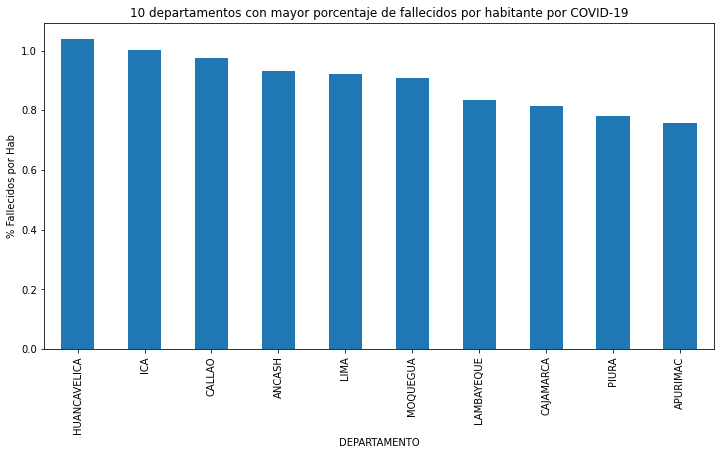

In [ ]:
data_top10 = series_dptos.head(10)

data_top10.plot(kind='bar', figsize=(12, 6))
plt.ylabel('% Fallecidos por Hab') 
plt.title('10 departamentos con mayor porcentaje de fallecidos por habitante por COVID-19') 
plt.show()

### Parte 2: Gráficas con datos demográficos <font color=red> (13 puntos) </font>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.style.use('ggplot') # optional: for ggplot-like style

data = pd.read_excel('ImmigrantsCanada.xlsx', sheet_name='Canada by Citizenship' )

#### Mostrar una tabla estilizada el dataframe ImmigrantsCanada, adicionando la columna Total (suma de todos los años) y mostrando dicha columna con gradiente de colores: 3 puntos

In [ ]:
data['Total'] = data.sum(axis=1)
data.set_index('Country', inplace=True)
data.style.background_gradient(subset=['Total'], cmap='BuGn')

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,5,11,6,8,23,26,22,8,26,38,27,58,49,70,169,168,165,268,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,61,34,51,31,59,61,44,18,23,21,27,19,12,13,25,17,25,14,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,519,374,538,678,763,1023,1022,366,380,396,391,349,318,427,635,865,1745,1591,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310



#### Generar un plot de histogramas de Inmigracion a Canada desde India y China: 3 puntos

         1980  1981  1982  1983  1984  ...   2009   2010   2011   2012   2013
Country                                ...                                   
India    8880  8670  8147  7338  5704  ...  29456  34235  27509  30933  33087
China    5123  6682  3308  1863  1527  ...  29622  30391  28502  33024  34129

[2 rows x 34 columns]


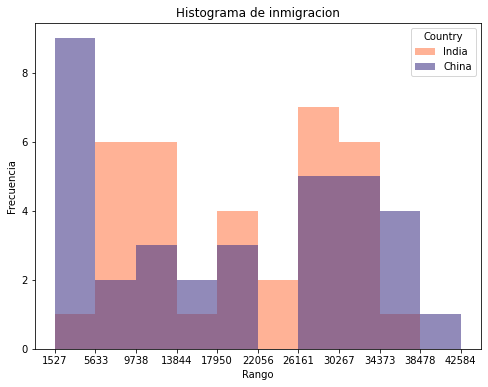

In [ ]:
years = list(map(str, range(1980, 2014)))

data.columns = list(map(str, data.columns))

data_india_china = data.loc[['India', 'China'], years]
print(data_india_china.head())

data_india_china = data_india_china.transpose()

count, bin_edges = np.histogram(data_india_china, bins=10)

data_india_china.plot(kind='hist', bins=10, figsize=(8, 6), xticks=bin_edges, alpha=0.6, color=['coral','darkslateblue'])

plt.title('Histograma de inmigracion')
plt.ylabel('Frecuencia')
plt.xlabel('Rango')
plt.show()

#### Hacer un Pie Chart de Inmigrantes por continente, pero solo considerar el periodo 2010-2013. Resaltar los dos continentes con las proporciones mas pequeñas (usar parámetro `explode`): 3 puntos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


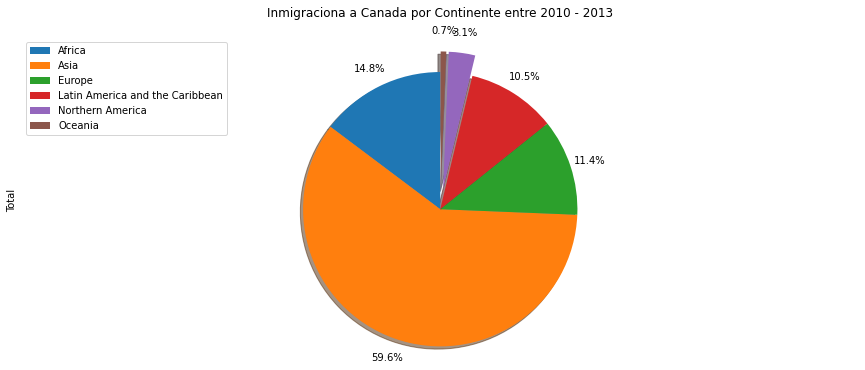

In [ ]:
years = list(map(str, range(2010, 2014)))

data_continents = data.groupby('Continent', axis=0).sum()

data_continents_2010 = data_continents[years]
data_continents_2010['Total'] = data_continents_2010.sum(axis=1)

explode_list = [0, 0, 0, 0, 0.15, 0.15]

data_continents_2010['Total'].plot(kind='pie',
                              figsize=(15, 6),
                              autopct='%1.1f%%',
                              startangle=90,
                              shadow=True,   
                              labels=None,
                              pctdistance=1.15,
                              explode=explode_list)

plt.title('Inmigraciona a Canada por Continente entre 2010 - 2013', pad=20)
plt.axis('equal')
plt.legend(labels = data_continents_2010.index, loc='upper left')  # añade leyenda
plt.show()

#### Hacer un gráfico comparando Box Plots de inmigrantes de paises sudamericanos en el periodo 1980-2013: 2 puntos

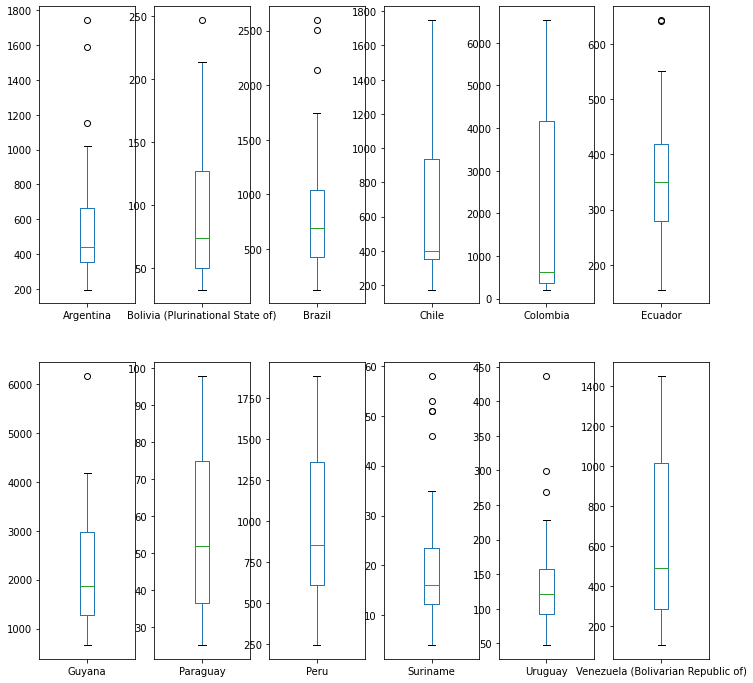

In [ ]:
data_subset = data[data['Region'] == 'South America'].drop(columns='Total')

data_countries = data_subset.groupby('Country', axis=0).sum()
data_countries = data_countries.transpose()

data_countries.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False, figsize=[12,12])
plt.show()

#### Crear un scatter plot de total de inmigrantes de paises sudamericanos vs año, para el periodo 1980-2013: 2 puntos

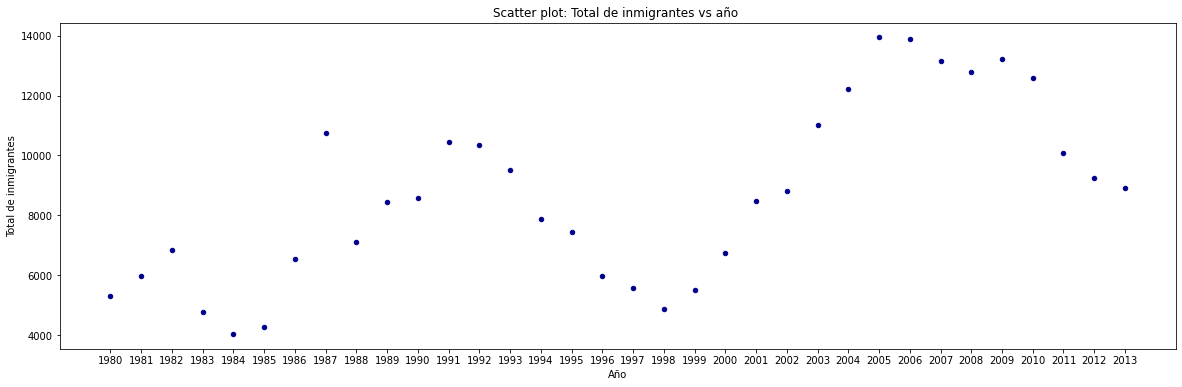

In [212]:
data_countries = data_subset.groupby('Country', axis=0).sum()

data_countries = data_countries.transpose()
data_countries['Total'] = data_countries.sum(axis=1)

data_countries.reset_index().plot(kind='scatter', x='index', y='Total', figsize=(20, 6), color='darkblue')

plt.title('Scatter plot: Total de inmigrantes vs año ')
plt.xlabel('Año')
plt.ylabel('Total de inmigrantes')
plt.show()